In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Task 1

# Load the data.

In [46]:
df=pd.read_csv('DS2_C6_S2_CarSales_Data_Challenge.csv')
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


# Preprocessing the data by dropping the year resale value feature and the missing values containing records.

In [15]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [16]:
df.shape

(157, 16)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [18]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [19]:
df.corr()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.279034,-0.304734,0.019983,-0.197756,0.358179,0.140918,0.254980,0.008628,0.086540,-0.016764,-0.223252
__year_resale_value,-0.279034,1.000000,0.953840,0.531330,0.769081,-0.052270,0.178767,0.026548,0.361557,0.325567,-0.399880,0.827123
Price_in_thousands,-0.304734,0.953840,1.000000,0.626875,0.839744,0.110513,0.329136,0.156935,0.526224,0.423282,-0.492157,0.897945
Engine_size,0.019983,0.531330,0.626875,1.000000,0.837360,0.472130,0.690398,0.541424,0.760043,0.663022,-0.734622,0.818528
Horsepower,-0.197756,0.769081,0.839744,0.837360,1.000000,0.286308,0.539158,0.393364,0.610131,0.499907,-0.611332,0.992994
Wheelbase,0.358179,-0.052270,0.110513,0.472130,0.286308,1.000000,0.683135,0.839639,0.651016,0.654044,-0.497931,0.258852
Width,0.140918,0.178767,0.329136,0.690398,0.539158,0.683135,1.000000,0.710435,0.720927,0.656302,-0.602546,0.512025
Length,0.254980,0.026548,0.156935,0.541424,0.393364,0.839639,0.710435,1.000000,0.627163,0.563540,-0.446756,0.354095
Curb_weight,0.008628,0.361557,0.526224,0.760043,0.610131,0.651016,0.720927,0.627163,1.000000,0.863968,-0.818402,0.612071
Fuel_capacity,0.086540,0.325567,0.423282,0.663022,0.499907,0.654044,0.656302,0.563540,0.863968,1.000000,-0.801512,0.501184


<AxesSubplot:>

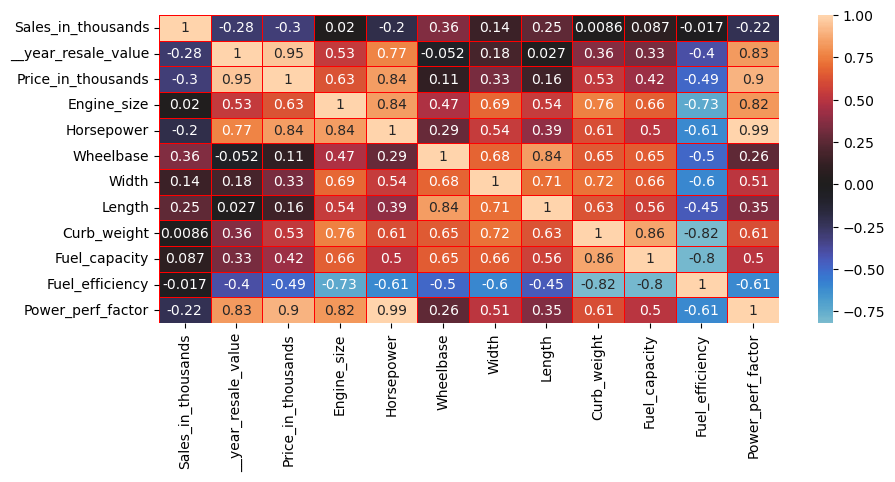

In [20]:
plt.figure(figsize=(10,4))
sb.heatmap(df.corr(),annot=True,linecolor='r',linewidths=.5,center=0)

In [21]:
df.drop(labels='__year_resale_value',axis=1,inplace=True)

In [22]:
df.isnull().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    2
Engine_size           1
Horsepower            1
Wheelbase             1
Width                 1
Length                1
Curb_weight           2
Fuel_capacity         1
Fuel_efficiency       3
Latest_Launch         0
Power_perf_factor     2
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        157 non-null    object 
 1   Model               157 non-null    object 
 2   Sales_in_thousands  157 non-null    float64
 3   Vehicle_type        157 non-null    object 
 4   Price_in_thousands  155 non-null    float64
 5   Engine_size         156 non-null    float64
 6   Horsepower          156 non-null    float64
 7   Wheelbase           156 non-null    float64
 8   Width               156 non-null    float64
 9   Length              156 non-null    float64
 10  Curb_weight         155 non-null    float64
 11  Fuel_capacity       156 non-null    float64
 12  Fuel_efficiency     154 non-null    float64
 13  Latest_Launch       157 non-null    object 
 14  Power_perf_factor   155 non-null    float64
dtypes: float64(11), object(4)
memory usage: 18.5+ KB


In [24]:
df[df['Price_in_thousands'].isnull()]
df['Price_in_thousands']=df['Price_in_thousands'].fillna(df['Price_in_thousands'].mean())

In [25]:
df[df['Engine_size'].isnull()]
df['Engine_size']=df['Engine_size'].fillna(df['Engine_size'].mean())

In [26]:
df[df['Horsepower'].isnull()]
df['Horsepower']=df['Horsepower'].fillna(df['Horsepower'].mean())

In [27]:
df[df['Wheelbase'].isnull()]
df['Wheelbase']=df['Wheelbase'].fillna(df['Wheelbase'].mean())

In [28]:
df[df['Width'].isnull()]
df['Width']=df['Width'].fillna(df['Width'].mean())

In [29]:
df[df['Length'].isnull()]
df['Length']=df['Length'].fillna(df['Length'].mean())

In [30]:
df[df['Curb_weight'].isnull()]
df['Curb_weight']=df['Curb_weight'].fillna(df['Curb_weight'].median())

In [31]:
df[df['Fuel_capacity'].isnull()]
df['Fuel_capacity']=df['Fuel_capacity'].fillna(df['Fuel_capacity'].median())

In [32]:
df[df['Fuel_efficiency'].isnull()]
df['Fuel_efficiency']=df['Fuel_efficiency'].fillna(df['Fuel_efficiency'].median())

In [33]:
df[df['Power_perf_factor'].isnull()]
df['Power_perf_factor']=df['Power_perf_factor'].fillna(df['Power_perf_factor'].median())

In [34]:
df.isnull().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()
df['Manufacturer']=a.fit_transform(df['Manufacturer'])
df['Model']=a.fit_transform(df['Model'])
df['Vehicle_type']=a.fit_transform(df['Vehicle_type'])
df['Latest_Launch']=a.fit_transform(df['Latest_Launch'])


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        157 non-null    int32  
 1   Model               157 non-null    int32  
 2   Sales_in_thousands  157 non-null    float64
 3   Vehicle_type        157 non-null    int32  
 4   Price_in_thousands  157 non-null    float64
 5   Engine_size         157 non-null    float64
 6   Horsepower          157 non-null    float64
 7   Wheelbase           157 non-null    float64
 8   Width               157 non-null    float64
 9   Length              157 non-null    float64
 10  Curb_weight         157 non-null    float64
 11  Fuel_capacity       157 non-null    float64
 12  Fuel_efficiency     157 non-null    float64
 13  Latest_Launch       157 non-null    int32  
 14  Power_perf_factor   157 non-null    float64
dtypes: float64(11), int32(4)
memory usage: 16.1 KB


In [37]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
df1=scale.fit_transform(df)
final_df=pd.DataFrame(df1,columns=df.columns)
final_df

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,-1.694221,0.029623,-0.532042,0.594515,-4.144370e-01,-1.214763,-0.81559,-0.828080,-1.122510,-1.119712,-1.182726,-1.228700,0.982264,-0.459471,-0.750757
1,-1.694221,1.453800,-0.200761,0.594515,7.100423e-02,0.134013,0.69316,0.080714,-0.247827,0.416338,0.223285,-0.193381,0.272684,0.755578,0.577776
2,-1.694221,-1.172026,-0.573406,0.594515,-1.249734e-15,0.134013,0.69316,-0.077337,-0.160359,0.348901,0.148020,-0.193381,0.509211,-1.463207,-0.198687
3,-1.694221,0.830723,-0.654896,0.594515,1.027816e+00,0.423037,0.42691,0.936825,0.072890,0.693576,0.756545,0.013683,-0.436897,-0.327400,0.578539
4,-1.577506,-1.550323,-0.480754,0.594515,-2.392560e-01,-1.214763,-0.63809,-0.643687,-0.860105,-0.700108,-0.607830,-0.400444,0.745737,-1.172652,-0.570191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,1.690504,1.565064,-0.729263,0.594515,-2.104110e-01,-1.118422,-0.46059,-0.920277,-1.035041,-0.805009,-0.537370,-0.555742,0.272684,1.574415,-0.420792
153,1.690504,1.053250,-0.556728,0.594515,7.685812e-03,-0.636716,-0.31859,-0.340756,-0.539388,-0.108167,-0.271541,-0.012200,0.272684,-1.014167,-0.253948
154,1.690504,1.587317,-0.523017,0.594515,9.914575e-02,-0.636716,-0.31859,-0.340756,-0.539388,-0.085688,-0.189871,-0.012200,0.272684,0.649922,-0.233814
155,1.690504,-1.194279,-0.730030,0.594515,1.274054e+00,-0.733058,0.88841,-0.340756,0.102046,-0.123153,0.357801,0.143098,-0.200370,0.174468,0.989400


In [38]:
x=final_df
final_df

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,-1.694221,0.029623,-0.532042,0.594515,-4.144370e-01,-1.214763,-0.81559,-0.828080,-1.122510,-1.119712,-1.182726,-1.228700,0.982264,-0.459471,-0.750757
1,-1.694221,1.453800,-0.200761,0.594515,7.100423e-02,0.134013,0.69316,0.080714,-0.247827,0.416338,0.223285,-0.193381,0.272684,0.755578,0.577776
2,-1.694221,-1.172026,-0.573406,0.594515,-1.249734e-15,0.134013,0.69316,-0.077337,-0.160359,0.348901,0.148020,-0.193381,0.509211,-1.463207,-0.198687
3,-1.694221,0.830723,-0.654896,0.594515,1.027816e+00,0.423037,0.42691,0.936825,0.072890,0.693576,0.756545,0.013683,-0.436897,-0.327400,0.578539
4,-1.577506,-1.550323,-0.480754,0.594515,-2.392560e-01,-1.214763,-0.63809,-0.643687,-0.860105,-0.700108,-0.607830,-0.400444,0.745737,-1.172652,-0.570191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,1.690504,1.565064,-0.729263,0.594515,-2.104110e-01,-1.118422,-0.46059,-0.920277,-1.035041,-0.805009,-0.537370,-0.555742,0.272684,1.574415,-0.420792
153,1.690504,1.053250,-0.556728,0.594515,7.685812e-03,-0.636716,-0.31859,-0.340756,-0.539388,-0.108167,-0.271541,-0.012200,0.272684,-1.014167,-0.253948
154,1.690504,1.587317,-0.523017,0.594515,9.914575e-02,-0.636716,-0.31859,-0.340756,-0.539388,-0.085688,-0.189871,-0.012200,0.272684,0.649922,-0.233814
155,1.690504,-1.194279,-0.730030,0.594515,1.274054e+00,-0.733058,0.88841,-0.340756,0.102046,-0.123153,0.357801,0.143098,-0.200370,0.174468,0.989400


# Task 2

# Compute the Elbow and the Silhouette values to find the (Statistical) best number of clusters for the K-Means algorithm.

Text(0, 0.5, 'values')

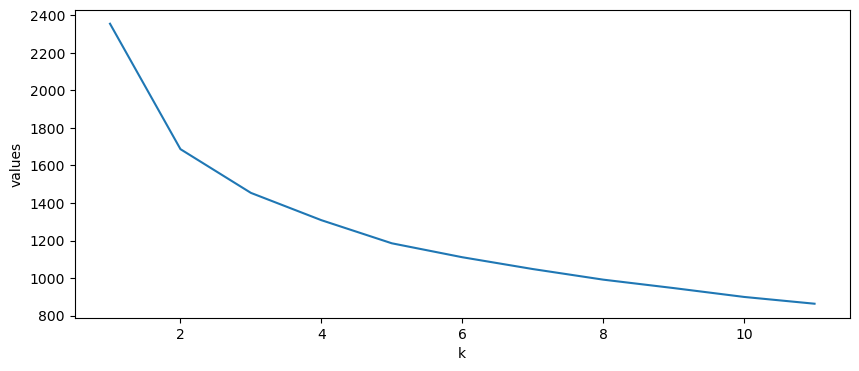

In [39]:
from sklearn.cluster import KMeans
value=[]
for k in range(1,12):
    KM=KMeans(n_clusters=k)
    KM.fit(x)
    value.append(KM.inertia_)
plt.figure(figsize=(10,4))
plt.plot(range(1,12),value)
plt.xlabel('k')
plt.ylabel('values')

The good k-value is 2.

For n_clusters = 2 The average silhouette_score is : 0.23265807683168974
For n_clusters = 3 The average silhouette_score is : 0.22243542640470398
For n_clusters = 4 The average silhouette_score is : 0.1786492362788708
For n_clusters = 5 The average silhouette_score is : 0.1928143987124084
For n_clusters = 6 The average silhouette_score is : 0.15429316202267634
For n_clusters = 7 The average silhouette_score is : 0.1570365581997134


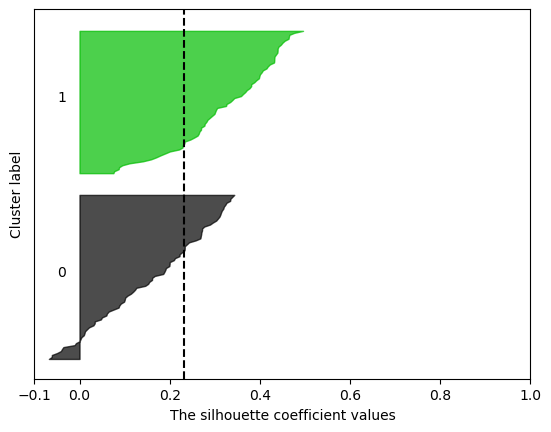

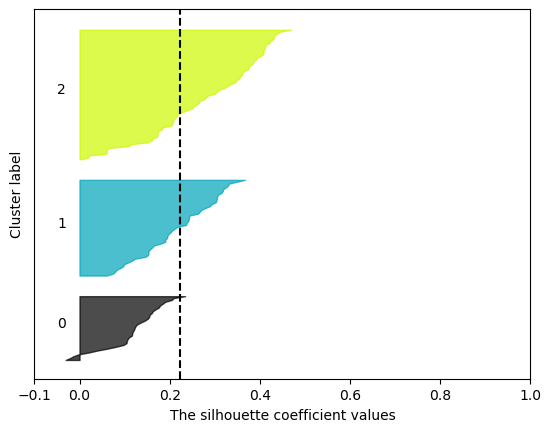

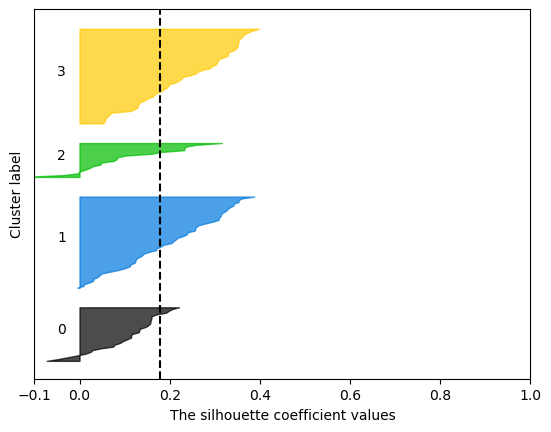

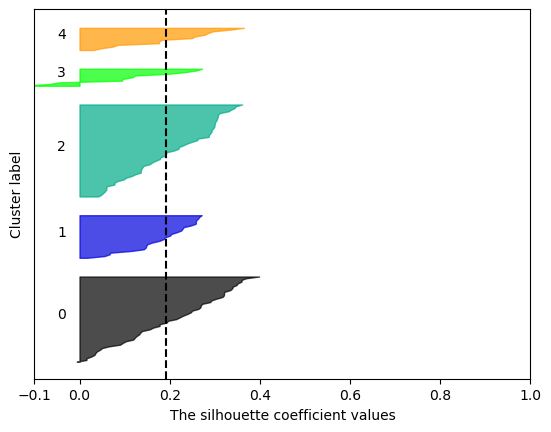

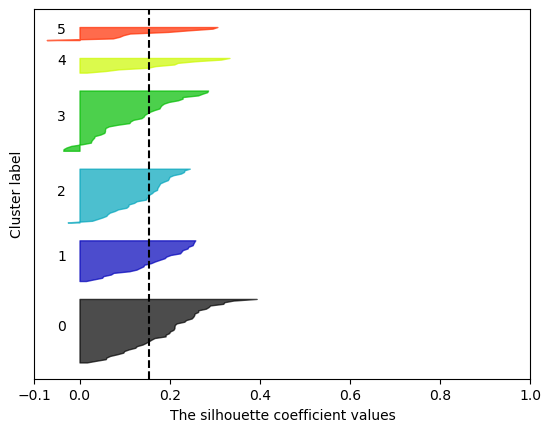

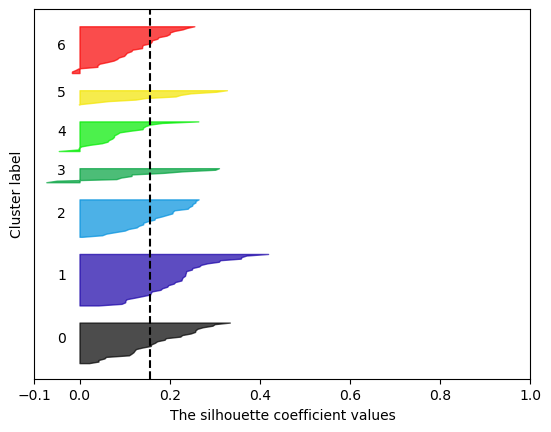

In [40]:
#optimum value of k using silhouette
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
range_n_clusters = [2, 3, 4, 5, 6, 7]
for n_clusters in range_n_clusters:
 # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
 # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)
     # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 # Compute the new y_lower for next plot
        y_lower = y_upper + 10 # 10 for the 0 samples
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
 # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="black", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()


The good k-value is 2.

# Task 3

# Bulid the model with the best k value.

# Do the clusters make sense?

In [41]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2)
model=km.fit(x)
model

KMeans(n_clusters=2)

In [42]:
model_pred=model.predict(x)
model_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0])

In [47]:
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [48]:
y=df.iloc[:,[3,2]].values
data1=pd.DataFrame(y)
data1.head()

,0,1
0,16.360,16.919
1,19.875,39.384
2,18.225,14.114
3,29.725,8.588
4,22.255,20.397


# Can you name the clusters based on their attributes?

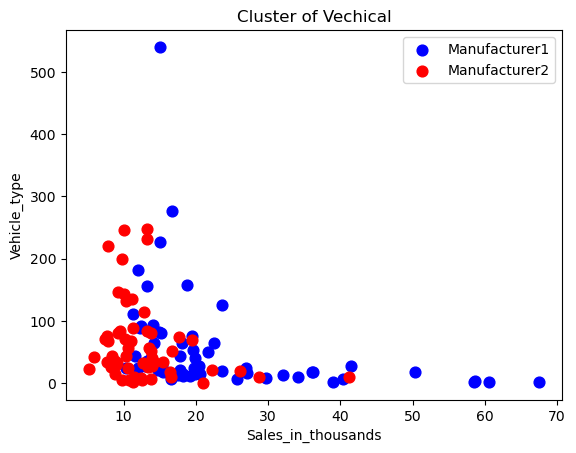

In [49]:
plt.scatter(y[model_pred==0,0],y[model_pred==0,1],s=60,c='blue',label='Manufacturer1')
plt.scatter(y[model_pred==1,0],y[model_pred==1,1],s=60,c='red',label='Manufacturer2')
plt.legend()
plt.title('Cluster of Vechical')
plt.xlabel('Sales_in_thousands')
plt.ylabel('Vehicle_type');

The clusters based on their attributes where Manufactures is 2 and one of the Manufacture is high as compre to other Manufacture.